# Model Preparation Challenge

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
import warnings

# import my useful functions library
import ds_useful

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

* First, load the dataset.

In [ ]:
# Establish postgres access details
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

# Start the engine and connect to the database
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# Perform a select query
life_df = pd.read_sql_query('SELECT * FROM {}'.format(table_name), con=engine)

# Dispose the engine. We don't need it anymore
engine.dispose()

In [13]:
print(life_df.info())
life_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


One thing I notice is that the column names are wack, with weird spaces in front or before. I am goint to fix this

In [ ]:
life_df.columns

In [34]:
life_df.rename(columns=lambda x: x.lstrip().rstrip().lower(), inplace=True)
life_df.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

* Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 


In [35]:
# LOOK FOR MISSING DATA
ds_useful.missingness_summary(life_df, False, 'desc')

population                         22.191967
hepatitis b                        18.822328
gdp                                15.248468
total expenditure                   7.692308
alcohol                             6.603131
income composition of resources     5.684139
schooling                           5.547992
bmi                                 1.157250
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
diphtheria                          0.646698
polio                               0.646698
adult mortality                     0.340368
life expectancy                     0.340368
under-five deaths                   0.000000
hiv/aids                            0.000000
measles                             0.000000
percentage expenditure              0.000000
infant deaths                       0.000000
status                              0.000000
year                                0.000000
country                             0.000000
dtype: flo

There seems to be a lot of missing data. A lot if it may be because it went unreported. I suspect filling the data on a basis of whether or not its a developed country is a good idea, and maybe by the year as well.

Since the dataset is organized by country 

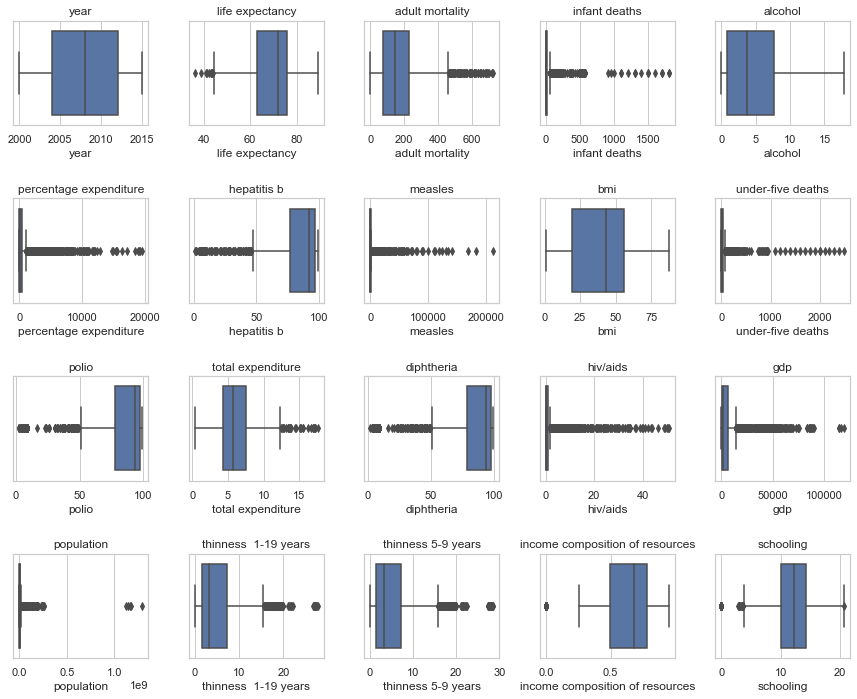

In [36]:
#First, let's look at all the distributions

# Plot all continuous distributions in a subplot.
ds_useful.auto_subplots(life_df, kind='boxplot')

Developing    2426
Developed      512
Name: status, dtype: int64


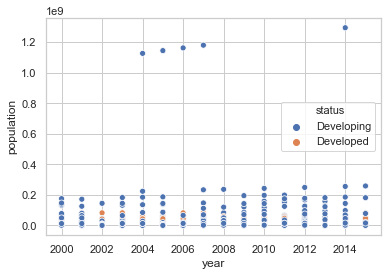

In [43]:
# Now we'll start to look at some of the missing variables one at a time. First, lets look at population. We'll compare developed and developing contries
print(life_df['status'].value_counts())

sns.scatterplot(x='year', y='population', data=life_df, hue='status')

country                             0.000000
year                                0.000000
status                              0.000000
infant deaths                       0.000000
percentage expenditure              0.000000
measles                             0.000000
under-five deaths                   0.000000
polio                               0.000000
diphtheria                          0.000000
hiv/aids                            0.000000
life expectancy                     0.340368
adult mortality                     0.340368
alcohol                             0.578625
total expenditure                   1.089176
thinness 5-9 years                  1.157250
thinness  1-19 years                1.157250
bmi                                 1.157250
hepatitis b                         4.901293
schooling                           5.547992
income composition of resources     5.684139
gdp                                13.784888
population                         22.055820
dtype: flo

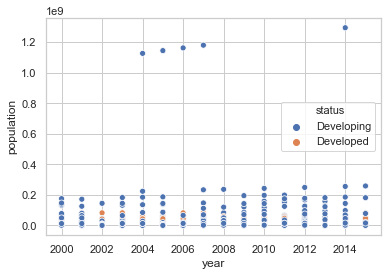

In [51]:
# Correct the outliers
# Fill the 

filled_df = life_df.copy()
for country in life_df['country'].unique():
    filled_df.loc[life_df['country'] == country] = life_df.loc[life_df['country'] == country].interpolate(
                                                                                                method='linear').fillna(
                                                                                                life_df.loc[life_df['country'] == country].median())
ds_useful.missingness_summary(filled_df, False, 'asc')

In [52]:
filled_df.loc[filled_df['population'].isnull()]['country'].value_counts()

Democratic Republic of the Congo                        16
Antigua and Barbuda                                     16
Viet Nam                                                16
Somalia                                                 16
Bahamas                                                 16
Cuba                                                    16
Lao People's Democratic Republic                        16
Egypt                                                   16
Congo                                                   16
Singapore                                               16
Saint Vincent and the Grenadines                        16
Republic of Korea                                       16
New Zealand                                             16
The former Yugoslav republic of Macedonia               16
Bolivia (Plurinational State of)                        16
Saint Lucia                                             16
Kyrgyzstan                                              